In [1]:
import __init__
from __init__ import DATA_PATH
from __init__ import PACKAGE_PATH
from dce import DCE
from cluster import Cluster
from descriptor import rdkitDescriptors
import utilities
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


(array([756.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 307.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

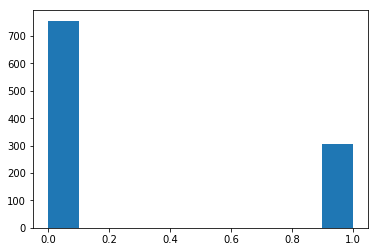

In [2]:
df = pd.read_csv(os.path.join(DATA_PATH,'BOD_RDKit_Descriptors_1063.csv'))
df['cleaned_bod'] = utilities.clean_out_of_bound(df['value (% BOD)'])

df['bi_class_partition'] = utilities.divide_classes(df['cleaned_bod'], [60])
true_label_biclass = df['bi_class_partition'].values
plt.hist(df['bi_class_partition'])

In [6]:
fps = rdkitDescriptors.batch_compute_rdkit_fingerprints(df['SMILES'])
len(fps[0])

2048

In [7]:
autoencoder_dims = [2048,512,128]
dce = DCE(autoencoder_dims, n_clusters=2, update_interval=50)
dce.build_model()

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
dce.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 2048)         0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 2048)         8192        input[0][0]                      
__________________________________________________________________________________________________
encoder_0 (Dense)               (None, 512)          1049088     batch_normalization_1[0][0]      
__________________________________________________________________________________________________
embedding_layer (Dense)         (None, 128)          65664       encoder_0[0][0]                  
__________________________________________________________________________________________________
decoder_1 

In [10]:
[y_pred, loss, delta_label] = dce.train_model(fps,clustering_loss='kld', 
                                              decoder_loss='mse', clustering_loss_weight=0.5)

Instructions for updating:
Use tf.cast instead.
Epoch: 0
  Total_loss = 0.0063355598;Delta_label = 0.0
  Clustering_loss = 0.0017597759; Decoder_loss = 0.010911344
Epoch: 50
  Total_loss = 0.0008937004;Delta_label = 0.062088428974600186
  Clustering_loss = 0.00086326146; Decoder_loss = 0.00092413934
Epoch: 100
  Total_loss = 0.0020124048;Delta_label = 0.034807149576669805
  Clustering_loss = 0.0031200466; Decoder_loss = 0.00090476294
Epoch: 150
  Total_loss = 0.0056721643;Delta_label = 0.016933207902163686
  Clustering_loss = 0.010448968; Decoder_loss = 0.00089536066
Epoch: 200
  Total_loss = 0.015684284;Delta_label = 0.008466603951081843
  Clustering_loss = 0.03049072; Decoder_loss = 0.00087784714
Epoch: 250
  Total_loss = 0.026794763;Delta_label = 0.008466603951081843
  Clustering_loss = 0.05271179; Decoder_loss = 0.00087773905
Epoch: 300
  Total_loss = 0.029559508;Delta_label = 0.004703668861712135
  Clustering_loss = 0.058243632; Decoder_loss = 0.0008753855
Epoch: 350
  Total_loss 

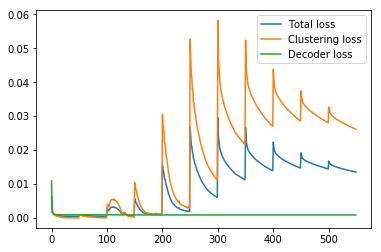

In [11]:
plt.plot(loss[0], label='Total loss')
plt.plot(loss[1], label='Clustering loss')
plt.plot(loss[2], label='Decoder loss')
plt.legend()

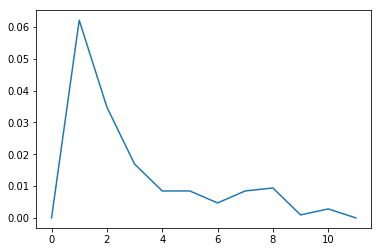

In [12]:
plt.plot(delta_label)

In [13]:
Cluster.true_label_metrics(true_label_biclass,y_pred,print_metric=True)

Metric with True label
adjusted rand score: 0.03477162070916135 
fowlkes_mallows : 0.5609099807592864


{'adjusted_rand_score': 0.03477162070916135,
 'fowlkes_mallows_score': 0.5609099807592864}

(array([479.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 584.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

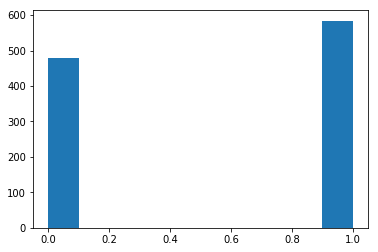

In [14]:
plt.hist(y_pred)